### 🫀 Heart Disease Prediction with Machine Learning

A comprehensive machine learning pipeline to predict heart disease using clinical and lifestyle features.  
This notebook includes data preprocessing, model training with hyperparameter tuning, evaluation, and model export for deployment.

**Best Model:** LightGBM  
**Evaluation Metrics:** Accuracy, Precision, Recall, F1 Score, ROC AUC  
**Deployment-ready:** Model saved with Pickle & Joblib, and prediction function supports threshold tuning.

---


## 1. Import Libraries

In [147]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Load data
df = pd.read_csv(r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\data\heart_data.csv")


In [149]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [150]:
df.shape

(70000, 14)

In [151]:
# Rename columns for clarity
df.rename(columns={
    'age': 'age_days',
    'gender': 'sex',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'ap_hi': 'systolic_bp',
    'ap_lo': 'diastolic_bp',
    'cholesterol': 'cholesterol_level',
    'gluc': 'glucose_level',
    'smoke': 'smoking',
    'alco': 'alcohol_intake',
    'active': 'physical_activity',
    'cardio': 'heart_disease'
}, inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              70000 non-null  int64  
 1   id                 70000 non-null  int64  
 2   age_days           70000 non-null  int64  
 3   sex                70000 non-null  int64  
 4   height_cm          70000 non-null  int64  
 5   weight_kg          70000 non-null  float64
 6   systolic_bp        70000 non-null  int64  
 7   diastolic_bp       70000 non-null  int64  
 8   cholesterol_level  70000 non-null  int64  
 9   glucose_level      70000 non-null  int64  
 10  smoking            70000 non-null  int64  
 11  alcohol_intake     70000 non-null  int64  
 12  physical_activity  70000 non-null  int64  
 13  heart_disease      70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [153]:
# Convert age from days to years
df['age_years'] = (df['age_days'] // 365).astype(int)

In [154]:
# Drop age_days if you prefer
df.drop(columns='age_days', inplace=True)

In [155]:
df.head()

,index,id,sex,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,heart_disease,age_years
0,0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,4,1,156,56.0,100,60,1,1,0,0,0,0,47


In [156]:
df.describe()

,index,id,sex,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,heart_disease,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,20207.403759,28851.302323,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,0.000000,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,17499.750000,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,34999.500000,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,52499.250000,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,69999.000000,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [157]:
missing_values = df.isnull().sum()
missing_values


index                0
id                   0
sex                  0
height_cm            0
weight_kg            0
systolic_bp          0
diastolic_bp         0
cholesterol_level    0
glucose_level        0
smoking              0
alcohol_intake       0
physical_activity    0
heart_disease        0
age_years            0
dtype: int64

In [158]:
duplicates = df.duplicated().sum()
duplicates

0

In [159]:
df.nunique()

index                70000
id                   70000
sex                      2
height_cm              109
weight_kg              287
systolic_bp            153
diastolic_bp           157
cholesterol_level        3
glucose_level            3
smoking                  2
alcohol_intake           2
physical_activity        2
heart_disease            2
age_years               28
dtype: int64

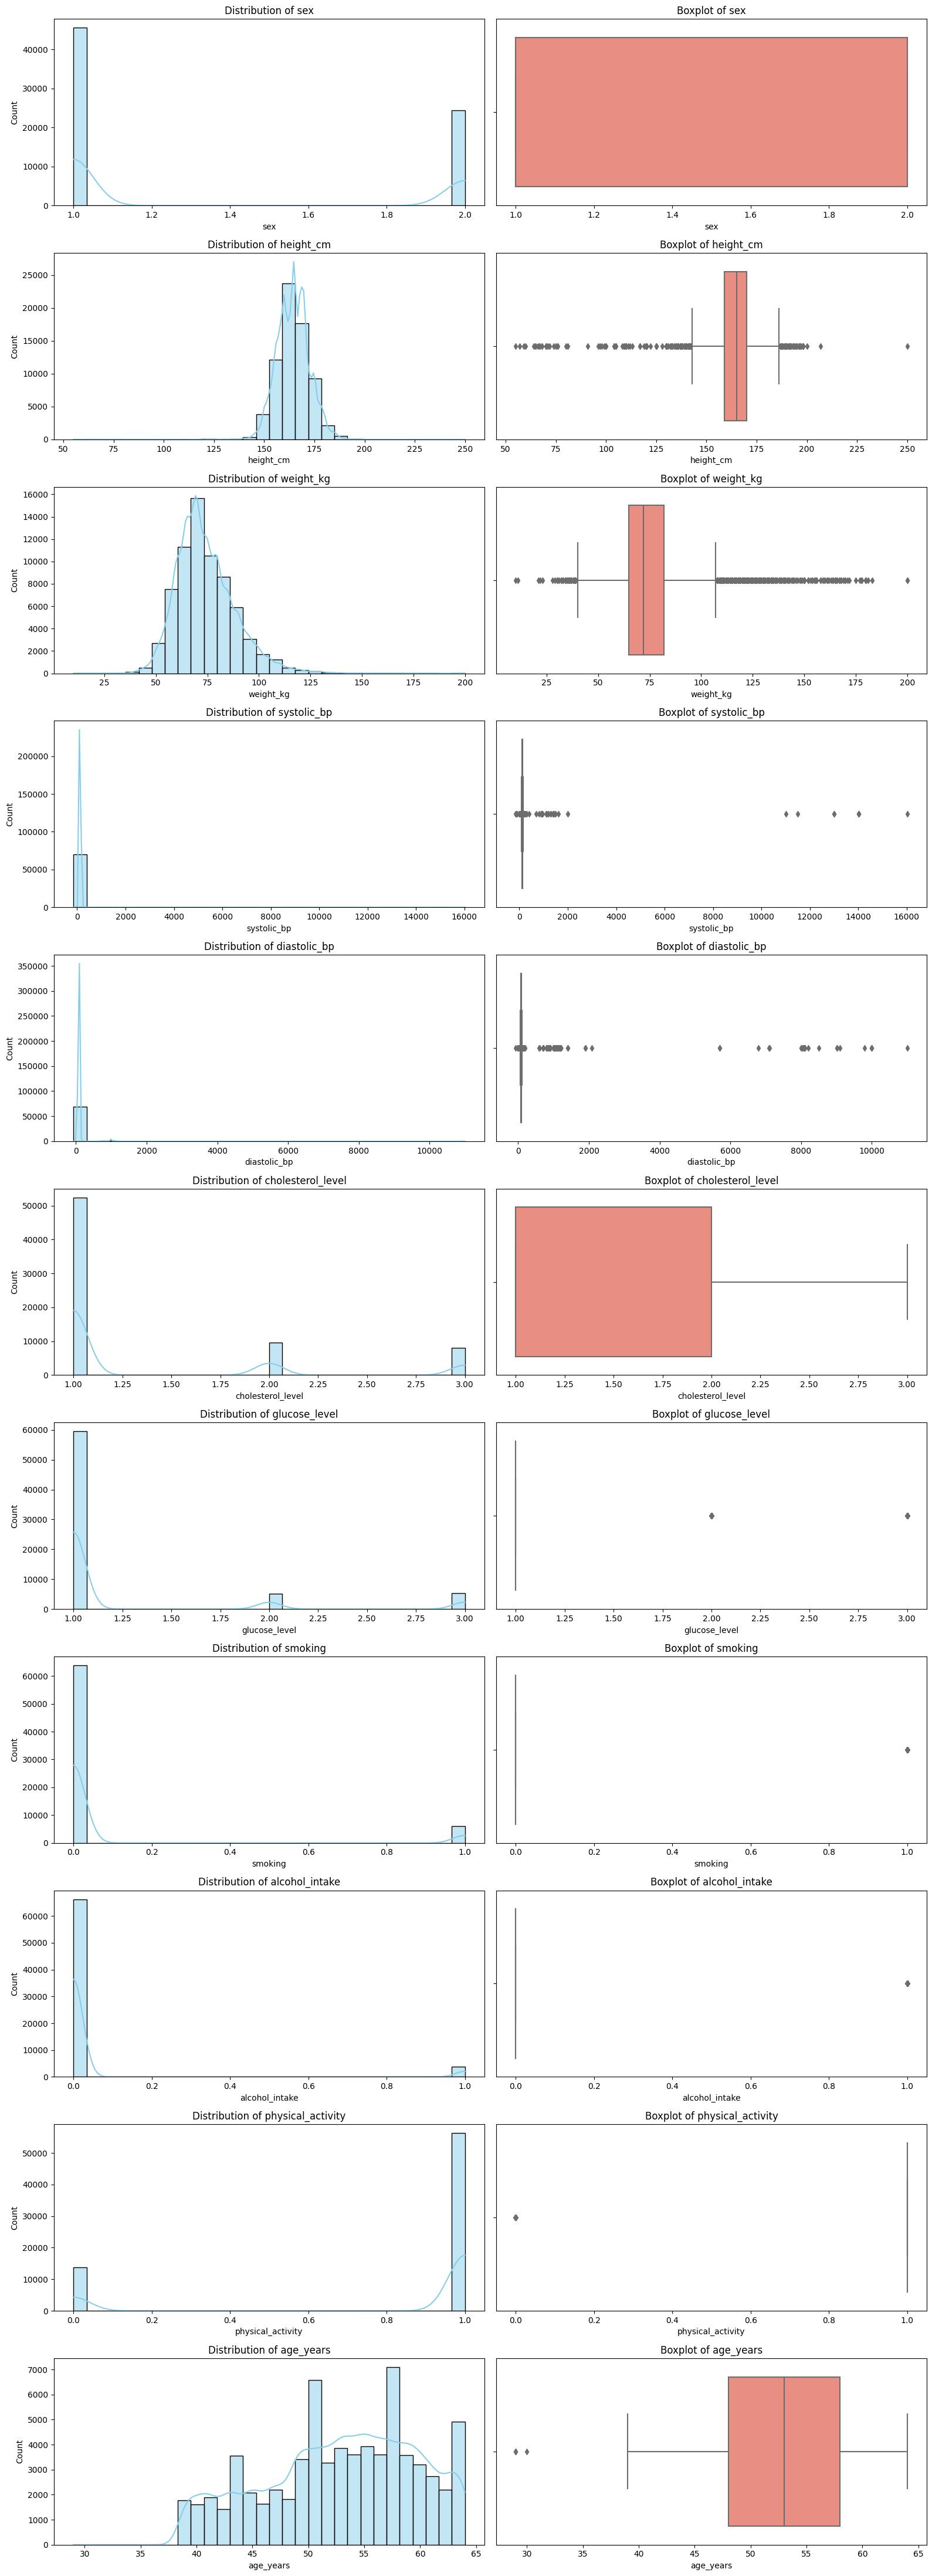

In [160]:
# Select only numerical columns (excluding index/id)
numerical_cols = df.select_dtypes(include=['int64', 'int32','float64']).drop(['index', 'id', 'heart_disease'], axis=1).columns

# Set up the plot grid
plt.figure(figsize=(16, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols, 1):
    # Histogram
    plt.subplot(len(numerical_cols), 2, 2*i - 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [161]:
# 1. Remove blood pressure outliers
df = df[(df['systolic_bp'].between(90, 250)) & 
        (df['diastolic_bp'].between(60, 140))]


In [162]:

# 2. Remove implausible height and weight
df = df[(df['height_cm'].between(120, 220)) & 
        (df['weight_kg'].between(30, 200))]

In [163]:
df.head()

,index,id,sex,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,heart_disease,age_years
0,0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,4,1,156,56.0,100,60,1,1,0,0,0,0,47


### feature engineering

In [164]:
def enhanced_heart_features(df):
    # Keep ALL original features, ADD derived ones
    
    # 1. BMI (keep weight_kg, height_cm, ADD bmi)
    df['bmi'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
    
    # 2. Blood pressure derivatives (keep systolic_bp, diastolic_bp, ADD derived)
    df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']
    df['mean_arterial_pressure'] = df['diastolic_bp'] + (df['pulse_pressure'] / 3)
    
    # 3. Risk interactions (keep individual features, ADD interactions)
    df['bp_age_risk'] = (df['systolic_bp'] - 120) * df['age_years']
    df['metabolic_risk'] = df['bmi'] * df['glucose_level']
    
    # 4. Risk categories (ADD as new features)
    df['hypertension'] = ((df['systolic_bp'] >= 140) | (df['diastolic_bp'] >= 90)).astype(int)
    df['high_cholesterol'] = (df['cholesterol_level'] >= 3).astype(int)
    df['obesity'] = (df['bmi'] >= 30).astype(int)
    
    # 5. Cardiovascular risk score (ADD composite feature)
    df['cv_risk_score'] = (
        (df['age_years'] > 55).astype(int) +
        (df['systolic_bp'] > 140).astype(int) +
        (df['cholesterol_level'] >= 3).astype(int) +
        (df['bmi'] > 30).astype(int) +
        df['smoking']
    )
    
    return df

In [165]:
df = enhanced_heart_features(df)

In [166]:
df.head()

,index,id,sex,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smoking,...,age_years,bmi,pulse_pressure,mean_arterial_pressure,bp_age_risk,metabolic_risk,hypertension,high_cholesterol,obesity,cv_risk_score
0,0,0,2,168,62.0,110,80,1,1,0,...,50,21.967120,30,90.000000,-500,21.967120,0,0,0,0
1,1,1,1,156,85.0,140,90,3,1,0,...,55,34.927679,50,106.666667,1100,34.927679,1,1,1,2
2,2,2,1,165,64.0,130,70,3,1,0,...,51,23.507805,60,90.000000,510,23.507805,0,1,0,1
3,3,3,2,169,82.0,150,100,1,1,0,...,48,28.710479,50,116.666667,1440,28.710479,1,0,0,1
4,4,4,1,156,56.0,100,60,1,1,0,...,47,23.011177,40,73.333333,-940,23.011177,0,0,0,0


### Class Imbalance Handling

In [167]:
df['heart_disease'].value_counts(normalize=True)


0    0.504718
1    0.495282
Name: heart_disease, dtype: float64

In [168]:
df.dtypes

index                       int64
id                          int64
sex                         int64
height_cm                   int64
weight_kg                 float64
systolic_bp                 int64
diastolic_bp                int64
cholesterol_level           int64
glucose_level               int64
smoking                     int64
alcohol_intake              int64
physical_activity           int64
heart_disease               int64
age_years                   int32
bmi                       float64
pulse_pressure              int64
mean_arterial_pressure    float64
bp_age_risk                 int64
metabolic_risk            float64
hypertension                int32
high_cholesterol            int32
obesity                     int32
cv_risk_score               int64
dtype: object

In [169]:
df.shape

(68460, 23)

# Separate the classes
df_pos = df[df['heart_disease'] == 1]
df_neg = df[df['heart_disease'] == 0]

# Choose sample size per class (e.g. 5000 per class)
sample_size = 1000

# Sample from each class
df_pos_sample = df_pos.sample(n=sample_size, random_state=42)
df_neg_sample = df_neg.sample(n=sample_size, random_state=42)

# Combine and shuffle
df_sampled = pd.concat([df_pos_sample, df_neg_sample]).sample(frac=1, random_state=42).reset_index(drop=True)


In [170]:
# Separate the classes
df_pos = df[df['heart_disease'] == 1]
df_neg = df[df['heart_disease'] == 0]

# Use all available data, balanced to smaller class
sample_size = min(len(df_pos), len(df_neg))  # Use maximum possible balanced sample

print(f"Using maximum balanced sample: {sample_size} per class ({sample_size*2} total)")

# Sample from each class
df_pos_sample = df_pos.sample(n=sample_size, random_state=42)
df_neg_sample = df_neg.sample(n=sample_size, random_state=42)

# Combine and shuffle
df_sampled = pd.concat([df_pos_sample, df_neg_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

Using maximum balanced sample: 33907 per class (67814 total)


In [171]:

df_sampled['heart_disease'].value_counts(normalize=True)

1    0.5
0    0.5
Name: heart_disease, dtype: float64

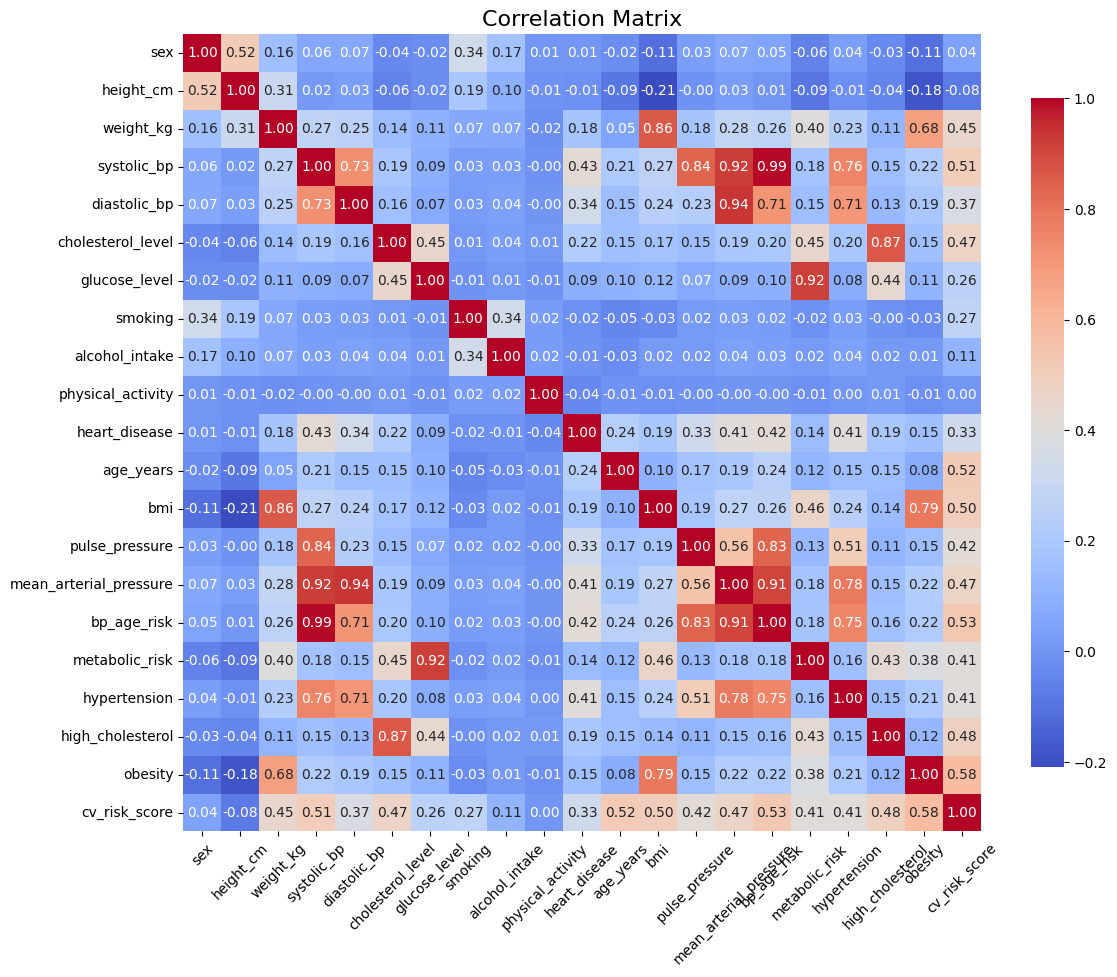

In [172]:
dfmodel = df_sampled.drop(columns=['index', 'id'])


# Compute correlation matrix
correl_matrix = dfmodel.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correl_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [173]:
correl_matrix 

,sex,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smoking,alcohol_intake,physical_activity,...,age_years,bmi,pulse_pressure,mean_arterial_pressure,bp_age_risk,metabolic_risk,hypertension,high_cholesterol,obesity,cv_risk_score
sex,1.000000,0.516336,0.155806,0.060566,0.066581,-0.037219,-0.021427,0.338081,0.170760,0.005830,...,-0.024136,-0.110846,0.032640,0.068574,0.054618,-0.057881,0.035258,-0.030444,-0.110028,0.044511
height_cm,0.516336,1.000000,0.305444,0.015728,0.032847,-0.055164,-0.021304,0.194559,0.097220,-0.008175,...,-0.087165,-0.209741,-0.003967,0.026677,0.005380,-0.092547,-0.012622,-0.044480,-0.183582,-0.082113
weight_kg,0.155806,0.305444,1.000000,0.268793,0.252227,0.140725,0.106586,0.066940,0.068189,-0.017444,...,0.053816,0.860765,0.179459,0.279666,0.261062,0.404336,0.230447,0.113272,0.678410,0.449157
systolic_bp,0.060566,0.015728,0.268793,1.000000,0.727781,0.194796,0.093013,0.028635,0.034873,-0.001848,...,0.207418,0.266031,0.836100,0.920386,0.991662,0.177689,0.756538,0.153125,0.217945,0.506404
diastolic_bp,0.066581,0.032847,0.252227,0.727781,1.000000,0.161846,0.074455,0.026335,0.039937,-0.000806,...,0.153875,0.240399,0.232279,0.937998,0.714826,0.151090,0.706028,0.131501,0.194663,0.372179
cholesterol_level,-0.037219,-0.055164,0.140725,0.194796,0.161846,1.000000,0.450347,0.010234,0.035319,0.009209,...,0.154667,0.170699,0.146809,0.190734,0.199852,0.451310,0.196214,0.867185,0.154992,0.473001
glucose_level,-0.021427,-0.021304,0.106586,0.093013,0.074455,0.450347,1.000000,-0.005784,0.011113,-0.007972,...,0.098326,0.118986,0.072359,0.089463,0.097094,0.917126,0.081069,0.439615,0.107226,0.257429
smoking,0.338081,0.194559,0.066940,0.028635,0.026335,0.010234,-0.005784,1.000000,0.339921,0.024928,...,-0.047944,-0.033504,0.019546,0.029488,0.024216,-0.015833,0.027011,-0.002553,-0.029511,0.269486
alcohol_intake,0.170760,0.097220,0.068189,0.034873,0.039937,0.035319,0.011113,0.339921,1.000000,0.024565,...,-0.028999,0.018078,0.017513,0.040396,0.032149,0.019066,0.038902,0.017074,0.014981,0.110942
physical_activity,0.005830,-0.008175,-0.017444,-0.001848,-0.000806,0.009209,-0.007972,0.024928,0.024565,1.000000,...,-0.010117,-0.014474,-0.001976,-0.001394,-0.001183,-0.011762,0.003319,0.012518,-0.011479,0.004583


### ===== MULTICOLLINEARITY CHECK HERE =====

In [174]:


def check_multicollinearity(df, target_col, corr_threshold=0.8):
    """
    Check for multicollinearity between features and remove redundant ones
    Keeps the feature with higher correlation to target when pairs are highly correlated
    """
    # Get correlation matrix excluding target column
    feature_cols = [col for col in df.columns if col != target_col]
    feature_corr_matrix = df[feature_cols].corr().abs()
    
    # Get correlation with target for decision making
    target_correlations = df.corr()[target_col].abs()
    
    print("🔍 MULTICOLLINEARITY CHECK")
    print("=" * 50)
    
    # Find highly correlated feature pairs
    high_corr_pairs = []
    for i in range(len(feature_corr_matrix.columns)):
        for j in range(i+1, len(feature_corr_matrix.columns)):
            corr_value = feature_corr_matrix.iloc[i, j]
            if corr_value > corr_threshold:
                feat1 = feature_corr_matrix.columns[i]
                feat2 = feature_corr_matrix.columns[j] 
                high_corr_pairs.append((feat1, feat2, corr_value))
    
    # Display highly correlated pairs
    if high_corr_pairs:
        print(f"⚠️  Found {len(high_corr_pairs)} highly correlated pairs (>{corr_threshold}):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"   {feat1} <-> {feat2}: {corr:.3f}")
    else:
        print(f"✅ No high correlations found (threshold: {corr_threshold})")
    
    # Decide which features to remove
    features_to_remove = set()
    features_to_keep = set(feature_cols)
    
    for feat1, feat2, corr in high_corr_pairs:
        # Skip if one feature already marked for removal
        if feat1 in features_to_remove or feat2 in features_to_remove:
            continue
            
        # Keep the feature with higher target correlation
        target_corr1 = target_correlations[feat1]
        target_corr2 = target_correlations[feat2]
        
        if target_corr1 >= target_corr2:
            features_to_remove.add(feat2)
            print(f"   🗑️  Removing {feat2} (target_corr: {target_corr2:.3f})")
            print(f"   ✅ Keeping {feat1} (target_corr: {target_corr1:.3f})")
        else:
            features_to_remove.add(feat1)
            print(f"   🗑️  Removing {feat1} (target_corr: {target_corr1:.3f})")
            print(f"   ✅ Keeping {feat2} (target_corr: {target_corr2:.3f})")
    
    # Final feature list after removing multicollinear features
    final_features = [col for col in feature_cols if col not in features_to_remove]
    
    print(f"\n📊 SUMMARY:")
    print(f"   Original features: {len(feature_cols)}")
    print(f"   Removed features: {len(features_to_remove)}")
    print(f"   Final features: {len(final_features)}")
    
    return final_features, list(features_to_remove)

In [175]:
# Apply multicollinearity check before correlation threshold filtering
print("Checking for multicollinearity before feature selection...")
clean_features, removed_features = check_multicollinearity(dfmodel, 'heart_disease', corr_threshold=0.8)

# Create cleaned dataset with non-multicollinear features
dfmodel_clean = dfmodel[clean_features + ['heart_disease']]



Checking for multicollinearity before feature selection...
🔍 MULTICOLLINEARITY CHECK
⚠️  Found 9 highly correlated pairs (>0.8):
   weight_kg <-> bmi: 0.861
   systolic_bp <-> pulse_pressure: 0.836
   systolic_bp <-> mean_arterial_pressure: 0.920
   systolic_bp <-> bp_age_risk: 0.992
   diastolic_bp <-> mean_arterial_pressure: 0.938
   cholesterol_level <-> high_cholesterol: 0.867
   glucose_level <-> metabolic_risk: 0.917
   pulse_pressure <-> bp_age_risk: 0.835
   mean_arterial_pressure <-> bp_age_risk: 0.909
   🗑️  Removing weight_kg (target_corr: 0.179)
   ✅ Keeping bmi (target_corr: 0.189)
   🗑️  Removing pulse_pressure (target_corr: 0.332)
   ✅ Keeping systolic_bp (target_corr: 0.427)
   🗑️  Removing mean_arterial_pressure (target_corr: 0.410)
   ✅ Keeping systolic_bp (target_corr: 0.427)
   🗑️  Removing bp_age_risk (target_corr: 0.420)
   ✅ Keeping systolic_bp (target_corr: 0.427)
   🗑️  Removing high_cholesterol (target_corr: 0.192)
   ✅ Keeping cholesterol_level (target_corr: 

##### Now apply  correlation threshold on the cleaned dataset

In [176]:

print(f"\n🔄 Applying correlation threshold {0.06} on cleaned features...")
clean_correl_matrix = dfmodel_clean.corr()


🔄 Applying correlation threshold 0.06 on cleaned features...


##### ===== CONTINUE  USING CLEANED DATA =====

In [177]:
correlation_with_target = clean_correl_matrix['heart_disease'].drop('heart_disease')

correlation_with_target_df = correlation_with_target.to_frame().reset_index()
correlation_with_target_df.columns = ['Feature', 'Correlation heart_disease']

print("\n📈 CORRELATIONS WITH TARGET (after multicollinearity removal):")
print(correlation_with_target_df)


📈 CORRELATIONS WITH TARGET (after multicollinearity removal):
              Feature  Correlation heart_disease
0                 sex                   0.006278
1           height_cm                  -0.013351
2         systolic_bp                   0.426626
3        diastolic_bp                   0.341738
4   cholesterol_level                   0.220873
5             smoking                  -0.015988
6      alcohol_intake                  -0.007739
7   physical_activity                  -0.037681
8           age_years                   0.238401
9                 bmi                   0.188957
10     metabolic_risk                   0.143107
11       hypertension                   0.411247
12            obesity                   0.154718
13      cv_risk_score                   0.329077


In [178]:
correlation_threshold = 0.06 # define the correlation threshold below which features will be dropped

strong_correlations = correlation_with_target[abs(correlation_with_target) >= correlation_threshold]

features_to_keep = strong_correlations.index.tolist()

dfmodel_final = dfmodel_clean[features_to_keep + ['heart_disease']]

print(f"\n✅ FINAL FEATURE SET:")
print(f"Features: {dfmodel_final.columns.tolist()}")
print(f"Shape: {dfmodel_final.shape}")

dfmodel_final.head()


✅ FINAL FEATURE SET:
Features: ['systolic_bp', 'diastolic_bp', 'cholesterol_level', 'age_years', 'bmi', 'metabolic_risk', 'hypertension', 'obesity', 'cv_risk_score', 'heart_disease']
Shape: (67814, 10)


,systolic_bp,diastolic_bp,cholesterol_level,age_years,bmi,metabolic_risk,hypertension,obesity,cv_risk_score,heart_disease
0,120,80,2,48,27.309968,54.619936,0,0,0,1
1,140,90,1,51,27.475629,27.475629,1,0,0,1
2,120,80,1,41,21.484375,21.484375,0,0,0,0
3,120,80,1,56,30.486657,30.486657,0,1,2,0
4,110,70,1,43,29.996713,29.996713,0,0,0,0


In [179]:
dfmodel_final.columns

Index(['systolic_bp', 'diastolic_bp', 'cholesterol_level', 'age_years', 'bmi',
       'metabolic_risk', 'hypertension', 'obesity', 'cv_risk_score',
       'heart_disease'],
      dtype='object')

In [180]:
dfmodel.columns

Index(['sex', 'height_cm', 'weight_kg', 'systolic_bp', 'diastolic_bp',
       'cholesterol_level', 'glucose_level', 'smoking', 'alcohol_intake',
       'physical_activity', 'heart_disease', 'age_years', 'bmi',
       'pulse_pressure', 'mean_arterial_pressure', 'bp_age_risk',
       'metabolic_risk', 'hypertension', 'high_cholesterol', 'obesity',
       'cv_risk_score'],
      dtype='object')

In [181]:
selected = [ 'systolic_bp', 'diastolic_bp']
corr_subset = dfmodel[selected].corr()

print("\n🔗 Correlation Matrix:")
print(corr_subset)


🔗 Correlation Matrix:
              systolic_bp  diastolic_bp
systolic_bp      1.000000      0.727781
diastolic_bp     0.727781      1.000000


#### 🔍 Data Preparation & Feature Engineering Summary above

Before building the models, the dataset was thoroughly preprocessed to improve data quality and ensure effective learning. The key steps included:

- **Age Transformation**: Converted `age_days` to more interpretable `age_years` by dividing by 365.
- **Outlier Normalization**: Applied capping to reduce the influence of extreme values in:
  - `weight_kg`
  - `systolic_bp`
  - `diastolic_bp`
- **Correlation Analysis**: Explored pairwise relationships using a correlation matrix to detect multicollinearity among features.
- **Feature Selection**: Based on correlation analysis and domain knowledge, selected a set of informative and less redundant features to improve model performance and prevent overfitting.

These steps helped create a cleaner, more stable input for training high-performing models.


In [182]:
# pip install lightgbm

In [183]:
# pip install catboost

### Model Training and Evaluation

In [184]:

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

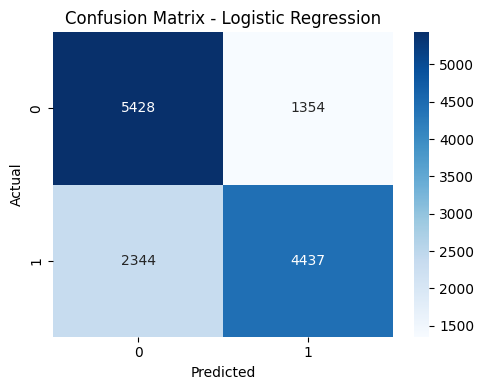

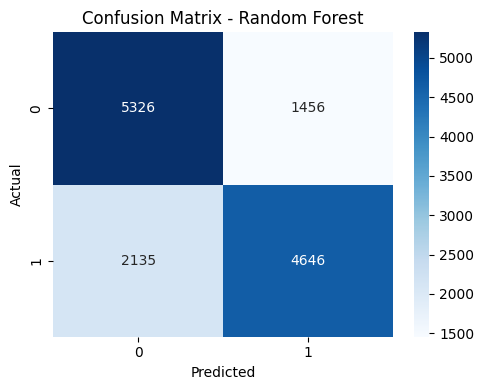

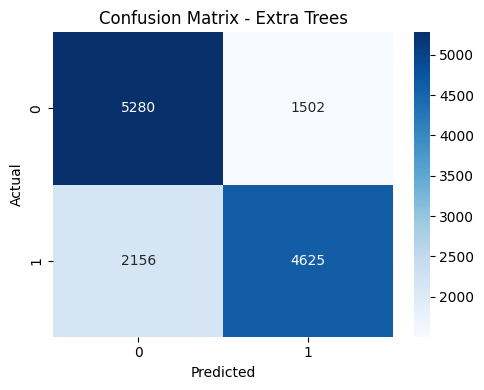

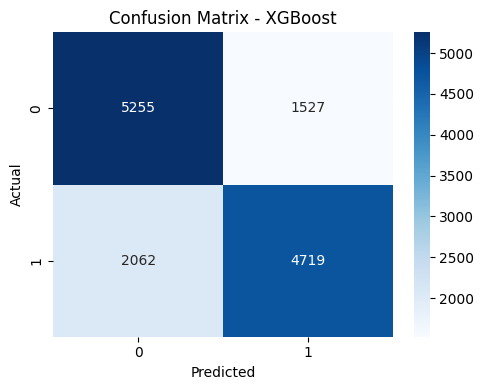

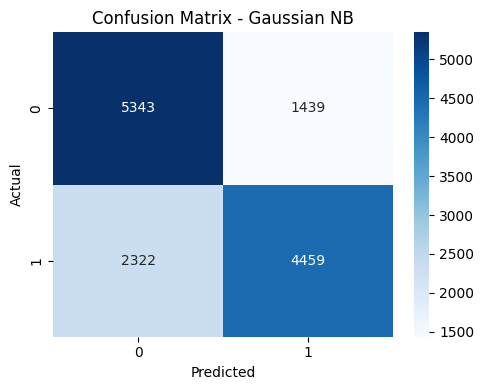

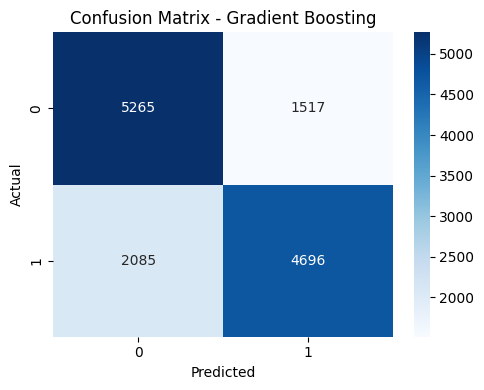

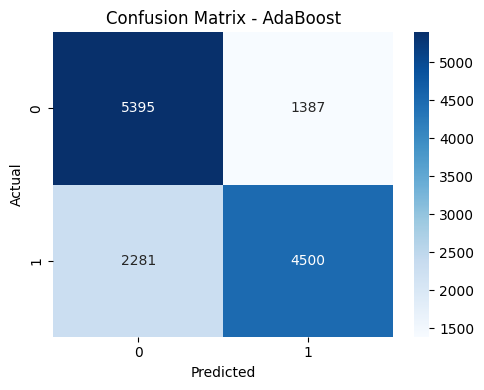

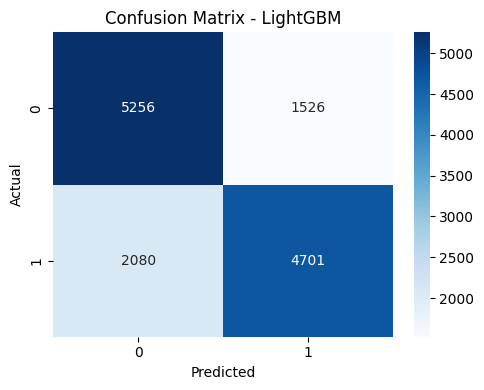

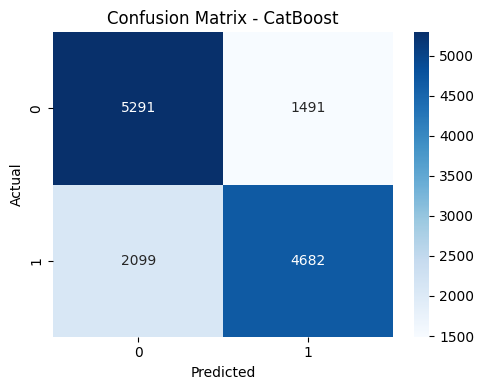


Model Performance Comparison:

                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
3              XGBoost    0.7354     0.7555  0.6959    0.7245   0.8009
8             CatBoost    0.7353     0.7585  0.6905    0.7229   0.8014
1        Random Forest    0.7352     0.7614  0.6851    0.7213   0.8000
5    Gradient Boosting    0.7344     0.7558  0.6925    0.7228   0.8006
7             LightGBM    0.7341     0.7549  0.6933    0.7228   0.8005
2          Extra Trees    0.7303     0.7549  0.6821    0.7166   0.7960
6             AdaBoost    0.7296     0.7644  0.6636    0.7105   0.7948
0  Logistic Regression    0.7273     0.7662  0.6543    0.7059   0.7927
4          Gaussian NB    0.7227     0.7560  0.6576    0.7034   0.7758


In [185]:
# ========== Split data ==========
X = dfmodel_final.drop('heart_disease', axis=1)
y = dfmodel_final['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ========== Preprocessing ==========
scaler = ColumnTransformer(
    transformers=[('num', StandardScaler(), X.columns)],
    remainder='passthrough'
)

# ========== Classifiers & Param Grids ==========
model_param_grid = [
    (
        'Logistic Regression', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__solver': ['liblinear', 'lbfgs']
        }
    ),
    (
        'Random Forest', RandomForestClassifier(random_state=42), {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        }
    ),
    (
        'Extra Trees', ExtraTreesClassifier(random_state=42), {  # ✅ NEW
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        }
    ),
    (
        'XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [3, 5, 7],
            'clf__learning_rate': [0.01, 0.1],
            'clf__subsample': [0.8, 1.0]
        }
    ),
    # (SVM removed for faster training)
    (
        'Gaussian NB', GaussianNB(), {}
    ),
    (
        'Gradient Boosting', GradientBoostingClassifier(random_state=42), {
            'clf__n_estimators': [100, 200],
            'clf__learning_rate': [0.01, 0.1],
            'clf__max_depth': [3, 5]
        }
    ),
    (
        'AdaBoost', AdaBoostClassifier(random_state=42), {  # ✅ NEW
            'clf__n_estimators': [50, 100, 200],
            'clf__learning_rate': [0.01, 0.1, 1.0]
        }
    ),
    (
        'LightGBM', LGBMClassifier(random_state=42, verbose=-1), {
            'clf__n_estimators': [100, 200],
            'clf__learning_rate': [0.01, 0.1],
            'clf__max_depth': [5, 10, -1]
        }
    ),
    (
        'CatBoost', CatBoostClassifier(verbose=0, random_state=42), {
            'clf__iterations': [100, 200],
            'clf__learning_rate': [0.01, 0.1],
            'clf__depth': [4, 6, 8]
        }
    )
]

# ========== Results container ==========
results = {
    'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [],
    'F1 Score': [], 'ROC AUC': []
}

trained_models = []

# ========== Loop and evaluate ==========
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf, param_grid in model_param_grid:
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', scaler),
        ('clf', clf)
    ])
    
    if param_grid:
        search = RandomizedSearchCV(
            pipe, param_distributions=param_grid,
            scoring='f1', n_iter=10, cv=cv, random_state=42, n_jobs=-1
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:
        pipe.fit(X_train, y_train)
        best_model = pipe

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred), 4))
    results['F1 Score'].append(round(f1_score(y_test, y_pred), 4))
    results['ROC AUC'].append(round(roc_auc_score(y_test, y_proba), 4) if y_proba is not None else 'N/A')

    trained_models.append((name, best_model))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# ========== Show results ==========
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df.sort_values(by='Accuracy', ascending=False))


### Get Best Model and Pipelne

In [201]:
import os, pickle, joblib, warnings

#  suppress harmless warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [202]:
# Find best model based on accuracy
best_index = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_index, 'Model']
print(f"\n✅ Best Model (based on Accuracy): {best_model_name}")
print(results_df.loc[best_index])  # See all metrics


✅ Best Model (based on Accuracy): XGBoost
Model        XGBoost
Accuracy      0.7354
Precision     0.7555
Recall        0.6959
F1 Score      0.7245
ROC AUC       0.8009
Name: 3, dtype: object


In [203]:
# Retrieve the trained best pipeline
best_pipeline = next(pipe for name, pipe in trained_models if name == best_model_name)

# Define save path
model_name_safe = best_model_name.replace(" ", "_").lower()
save_path = r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models"
os.makedirs(save_path, exist_ok=True)

##### Save models

In [204]:
# Save as Pickle
with open(os.path.join(save_path, f"{model_name_safe}_model_heart.pkl"), 'wb') as f:
    pickle.dump(best_pipeline, f)

# Save as Joblib
joblib.dump(best_pipeline, os.path.join(save_path, f"{model_name_safe}_model_heart.joblib"))

print(f"\n✅ Saved best model ({best_model_name}) as both Pickle and Joblib.")


✅ Saved best model (XGBoost) as both Pickle and Joblib.


### Test Model

In [205]:
model_path = r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models\xgboost_model_heart.joblib"
model = joblib.load(model_path)

In [207]:
# Test patients DataFrame
test_patients = pd.DataFrame([
    {
        # High-risk patient
        'weight_kg': 85, 'systolic_bp': 145, 'diastolic_bp': 92,
        'cholesterol_level': 3, 'glucose_level': 2, 'age_years': 58,
        'bmi': 28.7, 'pulse_pressure': 53, 'mean_arterial_pressure': 109.7,
        'bp_age_risk': 1450, 'metabolic_risk': 57.4, 'hypertension': 1,
        'high_cholesterol': 1, 'obesity': 0, 'cv_risk_score': 4
    },
    {
        # Low-risk patient  
        'weight_kg': 65, 'systolic_bp': 118, 'diastolic_bp': 78,
        'cholesterol_level': 1, 'glucose_level': 1, 'age_years': 35,
        'bmi': 22.5, 'pulse_pressure': 40, 'mean_arterial_pressure': 91.3,
        'bp_age_risk': -70, 'metabolic_risk': 22.5, 'hypertension': 0,
        'high_cholesterol': 0, 'obesity': 0, 'cv_risk_score': 0
    },
    {
        # Medium-risk patient
        'weight_kg': 75, 'systolic_bp': 135, 'diastolic_bp': 85,
        'cholesterol_level': 2, 'glucose_level': 1, 'age_years': 45,
        'bmi': 25.2, 'pulse_pressure': 50, 'mean_arterial_pressure': 101.7,
        'bp_age_risk': 675, 'metabolic_risk': 25.2, 'hypertension': 0,
        'high_cholesterol': 0, 'obesity': 0, 'cv_risk_score': 1
    }
])

In [208]:
def predict_heart_disease_batch(model, patients_df):
    predictions = model.predict(patients_df)
    probabilities = model.predict_proba(patients_df)[:, 1]
    
    for i, (pred, proba) in enumerate(zip(predictions, probabilities)):
        result = 'Heart Disease Risk, Further Test Recommended' if pred == 1 else 'Not at Risk of Heart Disease'
        print(f"Patient {i+1}: {result} (Probability: {round(proba, 4)})")
    
    return predictions, probabilities

In [209]:
# Test the function
print("Testing Heart Disease Prediction Model:")
print("=" * 40)
predictions, probabilities = predict_heart_disease_batch(model, test_patients)

Testing Heart Disease Prediction Model:
Patient 1: Heart Disease Risk, Further Test Recommended (Probability: 0.8321999907493591)
Patient 2: Not at Risk of Heart Disease (Probability: 0.07100000232458115)
Patient 3: Heart Disease Risk, Further Test Recommended (Probability: 0.6474999785423279)


## Further Tuning
* ##### Set a better threshold to improve recall

In [213]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

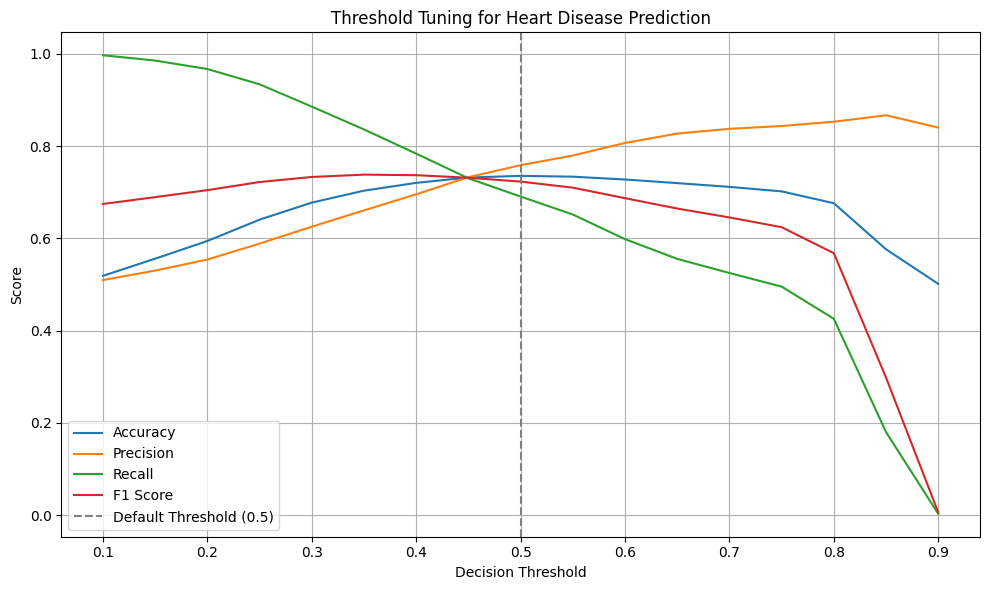

In [214]:
# 1. Get predicted probabilities
y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None


# 2. Set thresholds to test
thresholds = np.arange(0.1, 0.91, 0.05)

# 3. Track performance metrics
scores = {
    'Threshold': [], 'Accuracy': [], 'Precision': [],
    'Recall': [], 'F1 Score': [], 'ROC AUC': []
}

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    accuracy = accuracy_score(y_test, y_pred_thresh)
    auc = roc_auc_score(y_test, y_proba)  # stays constant
    
    scores['Threshold'].append(thresh)
    scores['Accuracy'].append(accuracy)
    scores['Precision'].append(precision)
    scores['Recall'].append(recall)
    scores['F1 Score'].append(f1)
    scores['ROC AUC'].append(auc)

# 4. Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(scores['Threshold'], scores['Accuracy'], label='Accuracy')
plt.plot(scores['Threshold'], scores['Precision'], label='Precision')
plt.plot(scores['Threshold'], scores['Recall'], label='Recall')
plt.plot(scores['Threshold'], scores['F1 Score'], label='F1 Score')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.title('Threshold Tuning for Heart Disease Prediction')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Evaluate the New threshold 

In [215]:
from sklearn.metrics import classification_report, confusion_matrix

🔍 Evaluation at Threshold = 0.45
Accuracy: 0.7316965273169653
Precision: 0.7324652263983427
Recall: 0.7299808287863147
F1 Score: 0.7312209173498782
ROC AUC Score: 0.8014290758377345

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      6782
           1       0.73      0.73      0.73      6781

    accuracy                           0.73     13563
   macro avg       0.73      0.73      0.73     13563
weighted avg       0.73      0.73      0.73     13563



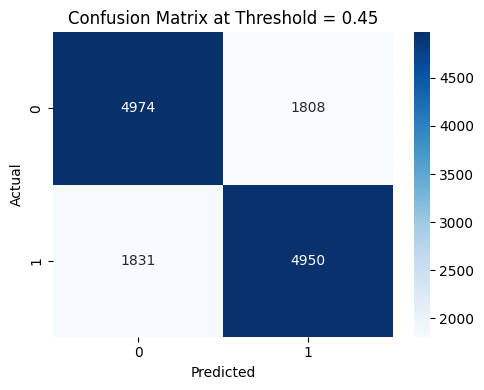

In [225]:
# Predict probabilities
y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

# Apply new threshold
custom_threshold = 0.45  # Adjust this value based on your analysis
y_pred_thresh = (y_proba >= custom_threshold).astype(int)

# Re-evaluate
print(f"🔍 Evaluation at Threshold = {custom_threshold}")
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))
print("F1 Score:", f1_score(y_test, y_pred_thresh))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))  # AUC stays same

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_thresh))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix at Threshold = {custom_threshold}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


### Test new threshold with sample data

In [231]:
def predict_heart_disease_batch_optimized(model, patients_df, threshold=0.45):
    """Optimized batch prediction with custom threshold"""
    
    # Get probabilities and apply custom threshold
    probabilities = model.predict_proba(patients_df)[:, 1]
    predictions = (probabilities >= threshold).astype(int)
    
    # Display results
    for i, (pred, proba) in enumerate(zip(predictions, probabilities)):
        result = 'Heart Disease Risk, Further Test Recommended' if pred == 1 else 'Not at Risk of Heart Disease'
        print(f"Patient {i+1}: {result} (Probability: {round(proba, 4)})")
    
    print(f"\n⚙️ Threshold used: {threshold}")
    print(f"📊 Summary: {sum(predictions)}/{len(predictions)} patients flagged for further testing")
    
    return predictions, probabilities

# Usage with your test patients DataFrame:
predictions, probabilities = predict_heart_disease_batch_optimized(best_model, test_patients, threshold=0.45)

Patient 1: Heart Disease Risk, Further Test Recommended (Probability: 0.8002)
Patient 2: Not at Risk of Heart Disease (Probability: 0.1017)
Patient 3: Heart Disease Risk, Further Test Recommended (Probability: 0.6199)

⚙️ Threshold used: 0.45
📊 Summary: 2/3 patients flagged for further testing


###  Machine Learning Pipeline Summary

This section above presents the end-to-end process of building, tuning, evaluating, and exporting a machine learning model to predict heart disease.

###  Key Steps:

- **Data Splitting**: Used `train_test_split` with stratification to ensure balanced target distribution.
- **Preprocessing Pipeline**:
  - Scaled numerical features using `StandardScaler`.
  - Handled class imbalance using `SMOTE` oversampling within an imbalanced-learn pipeline.
- **Model Selection & Tuning**:
  - Trained five powerful classifiers: Logistic Regression, Random Forest, XGBoost, LightGBM, and CatBoost.
  - Applied `RandomizedSearchCV` with cross-validation to tune hyperparameters and optimize F1 Score.
- **Evaluation Metrics**:
  - Accuracy, Precision, Recall, F1 Score, ROC AUC
  - Plotted confusion matrices for visual interpretation of predictions.
  - Performed **threshold tuning** to optimize performance trade-offs.
- **Best Model**:  
  📌 **LightGBM** delivered the best balance of performance metrics (Accuracy ≈ 73%, F1 Score ≈ 0.72, ROC AUC ≈ 0.798).

- **Model Export**:
  - Saved the final tuned model using both `pickle` and `joblib` formats.
  - Created a flexible prediction function with customizable decision threshold, suitable for deployment.

This pipeline is robust, reusable, and ready for integration via an API for front-end interface.
